In [41]:
# Udacity Data Science NanoDegree: Introduction to Data Science
# Project 1: Write a DataScience Blog
# Date of Analysis: 13 APR 2021

# Analysis of Stackoverflow 2017 Survey Data

# The Business Questions we will seek to answer in this project are:

# 1. Are those in the field looking for new work?
# 2. What are the different ways of working for those within the field of Data Science, and does it bring Satisfaction?
# 3. Does the education of the Parent relate to the respondent's education and consequently their salary?


In [42]:
# The Business Questions will be answered with the following data taken from the Stackoverflow 2017 Survey Data

#Q1: Utilise, JobSeekingStatus to understand if Respondents are currently looking for a new job. Summarise responses, 
## and compare to HoursPerWeek - this will demonstrare how much time a respondent is putting into finding a new job
## Understand if this is realted to the Salary the persons is earning. Consider also ImportantBenefits if possible

#Q2: Utilise either HomeRemote or Methodology fields. The HomeRemote field would be of interest along with HoursPerWeek
## Are those that are working from home spending more time looking for new work? Utilise also Satisfaction fields

#Q3: Discover if there is a relationship between Parental Education and Respondent Education - within the data there are
## the fields: HighestEducationParents and FormalEducation. Display this visually in a crosstab - maybe a heatmap? 
## Compare also the Respondent Salary and the Education level of the parent - does better education of parents lead to higher salaries?

In [43]:
# get packages for the project - import pandas and numpy as well as visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [44]:
#import the data and check the head - how does it look?
df_public= pd.read_csv("survey_results_public.csv")

df_public.head(5)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# gain size and shape of the dataframe
print(df_public.shape)

# gain list of all columns in the dataframe and identify fields required
print(df_public.columns.tolist())


(51392, 154)
['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University', 'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote', 'CompanySize', 'CompanyType', 'YearsProgram', 'YearsCodedJob', 'YearsCodedJobPast', 'DeveloperType', 'WebDeveloperType', 'MobileDeveloperType', 'NonDeveloperType', 'CareerSatisfaction', 'JobSatisfaction', 'ExCoderReturn', 'ExCoderNotForMe', 'ExCoderBalance', 'ExCoder10Years', 'ExCoderBelonged', 'ExCoderSkills', 'ExCoderWillNotCode', 'ExCoderActive', 'PronounceGIF', 'ProblemSolving', 'BuildingThings', 'LearningNewTech', 'BoringDetails', 'JobSecurity', 'DiversityImportant', 'AnnoyingUI', 'FriendsDevelopers', 'RightWrongWay', 'UnderstandComputers', 'SeriousWork', 'InvestTimeTools', 'WorkPayCare', 'KinshipDevelopers', 'ChallengeMyself', 'CompetePeers', 'ChangeWorld', 'JobSeekingStatus', 'HoursPerWeek', 'LastNewJob', 'AssessJobIndustry', 'AssessJobRole', 'AssessJobExp', 'AssessJobDept', 'AssessJobTech', 'AssessJobProjects', 'AssessJobCom

In [46]:
## Q1 - Are those in the field actually looking for new work?

## Prepare - investigate fields identifed to answer questions, unuderstand missing entries and impute if required

# what values are contained within the JobSeekingStatus field?
print(df_public['JobSeekingStatus'].value_counts()/np.sum(df_public['JobSeekingStatus'].notnull()))

# check for missing values - how complete is this field?
print("Missing cases: " +str(df_public['JobSeekingStatus'].isna().sum()))
print("Complete cases: " + str(np.sum(df_public['JobSeekingStatus'].notnull())))
print("Percent Missing: " +str(df_public['JobSeekingStatus'].isna().sum()/len(df_public['JobSeekingStatus'])))

# add a 'Missing' entry - this will help determine if differences are genuine when comparing metrics
df_public['JobSeekingStatus']=df_public[['JobSeekingStatus']].fillna(value='Missing')


I'm not actively looking, but I am open to new opportunities    0.621001
I am not interested in new job opportunities                    0.248053
I am actively looking for a job                                 0.130947
Name: JobSeekingStatus, dtype: float64
Missing cases: 18012
Complete cases: 33380
Percent Missing: 0.35048256537982564


In [47]:
## Summary analysis of prepared data

# use the group by function to create a summary - add count of Respondents in each group, and mean of HoursPerWeek and Salary
df_jobseek=df_public.groupby("JobSeekingStatus").agg({'Respondent':'count','HoursPerWeek':'mean', 'Salary':'mean'}).sort_values(by='HoursPerWeek', ascending=False).reset_index()
df_jobseek

,JobSeekingStatus,Respondent,HoursPerWeek,Salary
0,I am actively looking for a job,4371,8.241832,46466.057258
1,"I'm not actively looking, but I am open to new...",20729,2.857570,55157.846599
2,I am not interested in new job opportunities,8280,1.925926,65796.241218
3,Missing,18012,NaN,54527.639283


In [48]:
df_jobseek.columns

Index(['JobSeekingStatus', 'Respondent', 'HoursPerWeek', 'Salary'], dtype='object')

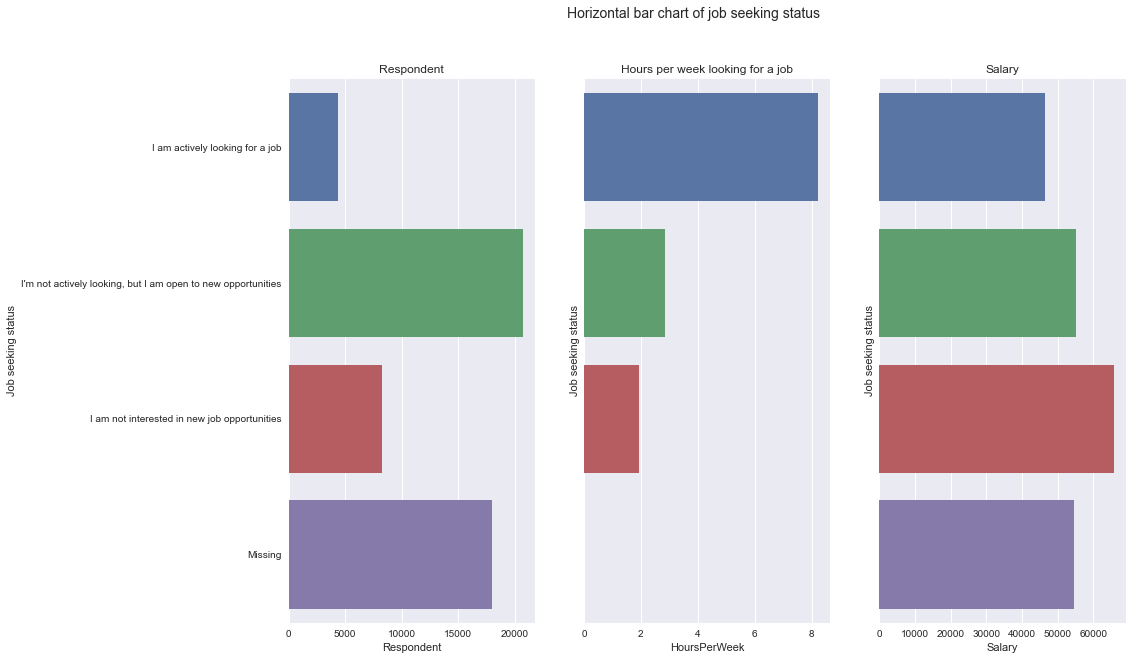

In [65]:
### Create a chart consisting of two/three barcharts that are horizontal
# use seaborn bar plot and subplot function

# create a figure and axes - set the dimensions of the subplot 1 R, 3 C
fig, axes = plt.subplots(1, 3, figsize=(15, 10), sharey=True)
fig.suptitle('Horizontal bar chart of job seeking status',fontsize=14)

# set the first bar - respondents 
sns.barplot(ax=axes[0], x=df_jobseek['Respondent'], y=df_jobseek['JobSeekingStatus'])
axes[0].set_title('Respondent')
axes[0].set_ylabel('Job seeking status')

# Hours per week 
sns.barplot(ax=axes[1], x=df_jobseek['HoursPerWeek'], y=df_jobseek['JobSeekingStatus'])
axes[1].set_title('Hours per week looking for a job')
axes[1].set_ylabel('Job seeking status')

# add the salary
sns.barplot(ax=axes[2], x=df_jobseek['Salary'], y=df_jobseek['JobSeekingStatus'])
axes[2].set_title('Salary')
axes[2].set_ylabel('Job seeking status')

plt.show()


In [50]:
#Q1 - summary and evaluation
# As expected, those that are actively seeing a new job are also those spending the most amount of time looking for work,
# and are being paid the least. The more someone is being paid the less time they spend looking for work

In [51]:
# Q2 - Working from home - check if there is missing data within this variable, and what does this represent of the total?

## investigate fields identifed to answer questions, unuderstand missing entries and impute if required
print("Missing cases: " + str(df_public['HomeRemote'].isna().sum()))
## there are 7384 missing entries

print("Complete cases: " + str(np.sum(df_public['HomeRemote'].notnull())))

print("Proportion missing: " + str((df_public['HomeRemote'].isna().sum()/len(df_public['HomeRemote'])*100)))
## 14% is missing

## input the missing value with 'Missing' for reporting and to ensure percentages sum to 1
df_public['HomeRemote']=df_public[['HomeRemote']].fillna(value='Missing')


Missing cases: 7384
Complete cases: 44008
Proportion missing: 14.367995018679949


A few days each month                                      30.070828
Never                                                      27.192948
Missing                                                    14.367995
All or almost all the time (I'm full-time remote)           9.544287
Less than half the time, but at least one day each week     8.069349
More than half, but not all, the time                       3.714586
It's complicated                                            3.597836
About half the time                                         3.442170
Name: HomeRemote, dtype: float64


Text(0, 0.5, 'Percentage (%) of Respondents')

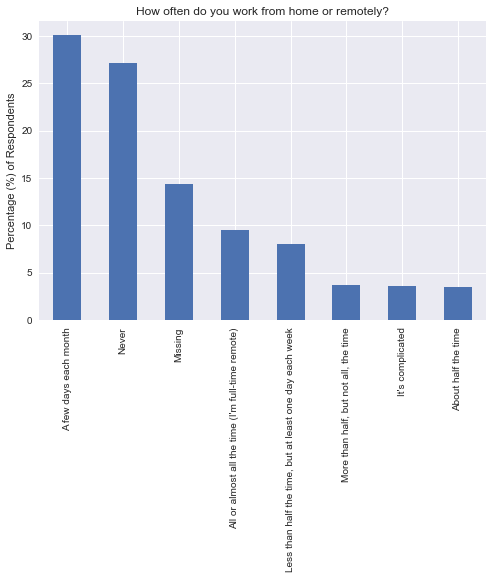

In [52]:
## Summarise the HomeRemote variable and present graphically

## create a series for plotting
wfh=df_public['HomeRemote'].value_counts()

## gain the proportion with the missing entries populated
wfh_props=(wfh/len(df_public['HomeRemote']))*100
print(wfh_props)

## create an bar chart showing how this is represented
plt.style.use('seaborn')
wfh_props.plot(kind="bar")
plt.title("How often do you work from home or remotely?")
plt.ylabel("Percentage (%) of Respondents")

In [53]:
## summary and evaluation Q2a - How/where do respondents spend their time working?

# We found that out of the 51,392 responses there were 440048 responses and 7384 missing cases
# the missing cases represents 14% of the data, there were recoded to 'missing' for presentation purposes

# The highest proportion for remote working was 30%, for 'A few days a month', closely followed by 'Never' at 27%, 
# these two groups take 57% of respondents answers - home working is not common within respondents


In [54]:
## Q2b - for those that responded to the HomeRemote question, are they satisfied? 
## or do they spend time looking for new Job oportunites? 

# check for missing values in the Hours Per Week variable, and input if missing
print(df_public['HoursPerWeek'].isna().sum())
## there are 30,792 missing entries

print(df_public['HoursPerWeek'].isna().sum()/len(df_public['HoursPerWeek']))
## 59% is missing

## check - is mean based on the reponses or inclusive of those that are missing?
## drop all cases where the HoursPerWeek is missing and then compare the mean results
df_Hoursdropped=df_public.dropna(subset=['HoursPerWeek'])
print("Complete responses with missing hours dropped: "+str(df_Hoursdropped['HoursPerWeek'].isna().sum()))

print(df_Hoursdropped['HoursPerWeek'].describe())

## the describe for both the mean without missing HoursPerWeek dropped and the missing cases retained are the same 


30792
0.599159402241594
Complete responses with missing hours dropped: 0
count    20600.000000
mean         3.952282
std          7.564722
min          0.000000
25%          1.000000
50%          1.000000
75%          4.000000
max         40.000000
Name: HoursPerWeek, dtype: float64


In [55]:
## summary output for Q2a

# use a group by and the agg function to get a group of summaries
df_home=df_public.groupby("HomeRemote").agg({'Respondent':'count','HoursPerWeek':'mean','CareerSatisfaction':'median','JobSatisfaction':'median'}).sort_values(by='HoursPerWeek',ascending=False).reset_index()
df_home

,HomeRemote,Respondent,HoursPerWeek,CareerSatisfaction,JobSatisfaction
0,Missing,7384,6.496498,7.0,7.0
1,About half the time,1769,4.951187,8.0,7.0
2,"More than half, but not all, the time",1909,4.882688,8.0,7.0
3,All or almost all the time (I'm full-time remote),4905,4.504069,8.0,8.0
4,"Less than half the time, but at least one day ...",4147,3.411154,8.0,7.0
5,A few days each month,15454,3.295040,8.0,7.0
6,Never,13975,3.294249,7.0,7.0
7,It's complicated,1849,2.592838,8.0,7.0


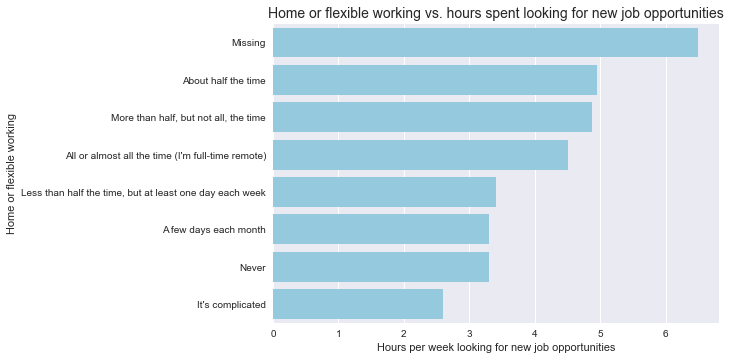

In [56]:
# create a bar chart to show the home working types verseus hours pspent looking for a new job

sns.barplot(x=df_home['HoursPerWeek'], y=df_home['HomeRemote'], color='skyblue')
plt.title("Home or flexible working vs. hours spent looking for new job opportunities", fontsize=14)
plt.xlabel("Hours per week looking for new job opportunities")
plt.ylabel("Home or flexible working")
plt.show()


In [57]:
## Q2b - summary and evaluation
# When respondents are working from home are they happy or are they looking for new work?


## Generally as people increase the amount of time working from home the more time is spend on activities 
## relating to finding new job opportunities - the mean response of those Never working from home was 3.29 hours 
## compared to 4.5 hours a week for those working from home all of the time
## but this is not charecterised in either career or Job satisfaction 
## - median values for satisfaction is consistient across all home working groups

In [58]:
## Q3 - Is there is a relationship between attainment (measured through salary and Education) and HighestEducationParents

## how many missing values are there in this question that are missing?
print(df_public['HighestEducationParents'].isna().sum())

## there are 16,454 missing entries
## meaning there are ~35k complete responses

print(df_public['HighestEducationParents'].isna().sum()/len(df_public['HighestEducationParents']))
## 32% is missing

## what values does HighestEducationParents have? and how does this compare to FormalEducation?
print(df_public['HighestEducationParents'].value_counts())

print(df_public['FormalEducation'].value_counts())

## Impute a 'Missing' level for both variables so we have a match for each level - create a function to do this
addmiss=['FormalEducation','HighestEducationParents']

for cols in addmiss:
    df_public[cols] =df_public[cols].fillna(value='Missing')
    

16454
0.3201665628891656
A bachelor's degree                                    10175
A master's degree                                       7561
High school                                             5887
Some college/university study, no bachelor's degree     4783
A doctoral degree                                       2060
A professional degree                                   1546
Primary/elementary school                               1378
I don't know/not sure                                    726
I prefer not to answer                                   612
No education                                             210
Name: HighestEducationParents, dtype: int64
Bachelor's degree                                                    21609
Master's degree                                                      11141
Some college/university study without earning a bachelor's degree     8129
Secondary school                                                      5908
Doctoral degree      

In [59]:
# There are Two many levels to sumamrise in a table - we would lose interpretability 
# group levels together in to higher and lower - we lose deatil but increases interpretability

# Ammend function provided by Udacity- Lesson 1, Data Science part 12
# include education types in HighestEducationParents field and split into Higher and Lower


def higher_ed(formal_ed_str):
    '''
    PURPOSE: The purpose of this function is to categorise education levels based on whether the reponse contains 
            a particular string
    
    INPUT
        formal_ed_str - a string containing values from the education field to be searched for
        
    OUTPUT
        return 'Higher Education' if the string is in "A bachelor's degree","A master's degree", "A doctoral degree","A professional degree","Bachelor's degree","Master's degree","Doctoral degree", "Professional degree"
    
        return 'Missing' where there has been no resonse - this may be useful to compare  if differences are real
    
        return 'No Higher Education' otherwise
    
    '''
    if formal_ed_str in ("A bachelor's degree","A master's degree", "A doctoral degree","A professional degree","Bachelor's degree","Master's degree","Doctoral degree", "Professional degree"):
        return 'Higher Education'
    elif formal_ed_str in ("High school","Secondary school","Some college/university study, no bachelor's degree","Some college/university study without earning a bachelor's degree","Primary/elementary school","No education","I never completed any formal education"): 
        return 'No Higher Education'
    else:    
        return 'Missing or Not Answered'        
    
#print the first 5 rows of the data frame for the field HighestEducationParents to check that string has been added
print(df_public["HighestEducationParents"].apply(higher_ed)[:5]) 

# apply the function to the data, creating new columns whilst doing so 
df_public['Higher_ed_respondent'] = df_public["FormalEducation"].apply(higher_ed)
df_public['Higher_ed_parent'] = df_public["HighestEducationParents"].apply(higher_ed)

0        No Higher Education
1           Higher Education
2           Higher Education
3           Higher Education
4    Missing or Not Answered
Name: HighestEducationParents, dtype: object


In [60]:
## can we create a heatmap showing relationship between HighestEducationParents and FormalEducation
## we want to show which groups between the two variables match 
## we would need to pivot the table so that there is only FormalEducation and HighestEducationParents, 
## and we need counts of entries

education=['Higher_ed_respondent','Higher_ed_parent']

df_groupby=df_public.groupby(education)['Respondent'].count().reset_index()
df_groupby.head(5)

# we can flip this using a pivot table
df_groupby2=pd.pivot_table(df_groupby,values='Respondent',index='Higher_ed_parent',columns='Higher_ed_respondent',aggfunc=np.sum)

## check the data
df_groupby2.head(5)


Higher_ed_respondent,Higher Education,Missing or Not Answered,No Higher Education
Higher_ed_parent,,,
Higher Education,16752,159,4431
Missing or Not Answered,11154,854,5784
No Higher Education,6867,96,5295


Higher_ed_respondent,Higher Education,Missing or Not Answered,No Higher Education,HigherEdPer,NoHigherEdPer
Higher_ed_parent,,,,,
Higher Education,16752,159,4431,0.784931,0.207619
Missing or Not Answered,11154,854,5784,0.626911,0.325090
No Higher Education,6867,96,5295,0.560206,0.431963


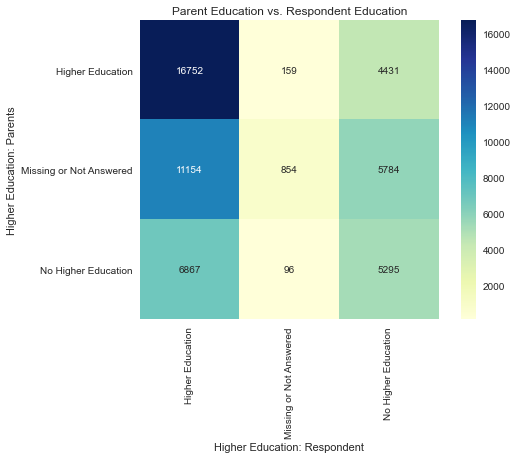

In [61]:
# use seaborn for the heatmap
sns.heatmap(df_groupby2,square=True,annot=True,fmt='d', cmap="YlGnBu")
plt.title("Parent Education vs. Respondent Education")
plt.ylabel("Higher Education: Parents")
plt.xlabel("Higher Education: Respondent")

# gain percentages for interpretation
# row percentage - i.e if the parent has an education level what level does the respondent have
df_groupby2['HigherEdPer']=df_groupby2['Higher Education']/(df_groupby2['Higher Education']+df_groupby2['No Higher Education']+df_groupby2['Missing or Not Answered'])
df_groupby2['NoHigherEdPer']=df_groupby2['No Higher Education']/(df_groupby2['Higher Education']+df_groupby2['No Higher Education']+df_groupby2['Missing or Not Answered'])

df_groupby2.head(5)


In [62]:
## Q3a - summary and evaluation

## We have found that generally if the parent has a high level of education then 
## it is likely the respondent will also have higher Education (78.4% vs. 20.7%)

## The converse is not true however, where the parent has No Higher Education then the proportion of respondents
## with and withouht higher education is closer (56.0% vs 43.1%) 

Higher_ed_parent
Higher Education           59874.924701
Missing or Not Answered    47037.627186
No Higher Education        53145.089377
Name: Salary, dtype: float64


Text(0, 0.5, 'Salary')

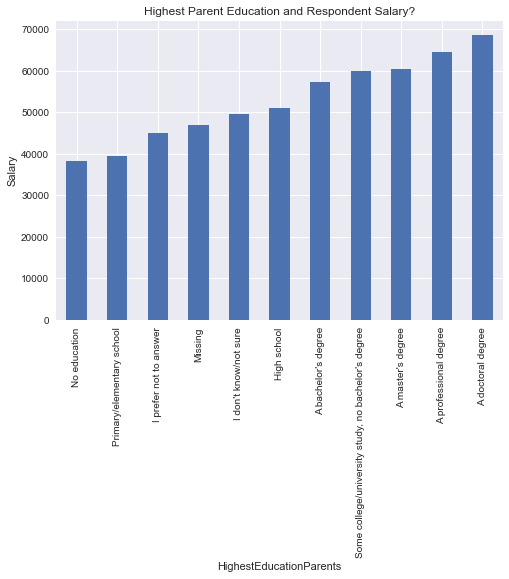

In [63]:
## Q3b - and does the HighestEducationParents relate to earned salary of the respondent?
parent_ed=df_public.groupby(['HighestEducationParents'])['Salary'].mean().sort_values()

print(df_public.groupby(['Higher_ed_parent'])['Salary'].mean())

## create an bar chart showing how this is represented
parent_ed.plot(kind="bar")
plt.title("Highest Parent Education and Respondent Salary?")
plt.ylabel("Salary")


In [64]:
# Q3b - summary and evaluation

# generally where the parent has a higher education then the respondent will have on average a higher salary compared to those 
# where their parent did not have a higher education. On average Salary of the respondent where the parent had a 
# higher education was 59,874, compared to 53,145 for those where the parent did not have a higher education